<a href="https://colab.research.google.com/github/ronan99/FruitQuality/blob/master/DownloadDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
import os
import zipfile



In [0]:
!ls -lha kaggle.json
!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
!kaggle config path -p /content
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification



-rw-r--r-- 1 root root 63 Aug  9 22:32 kaggle.json
usage: kaggle config [-h] {view,set,unset} ...
kaggle config: error: argument command: invalid choice: 'path' (choose from 'view', 'set', 'unset')
100% 1.79G/1.79G [00:44<00:00, 57.9MB/s]
100% 1.79G/1.79G [00:44<00:00, 43.2MB/s]


In [0]:
if not os.path.exists("/content/fruits-fresh-and-rotten-for-classification"):
  os.makedirs("/content/fruits-fresh-and-rotten-for-classification")
os.rename('/content/fruits-fresh-and-rotten-for-classification.zip','/content/fruits-fresh-and-rotten-for-classification/fruits-fresh-and-rotten-for-classification.zip')
os.chdir('/content/fruits-fresh-and-rotten-for-classification')
for file in os.listdir():
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall()
    zip_ref.close()

In [0]:
from PIL import Image
import cv2
import numpy as np
from random import shuffle
from tqdm import tqdm
from tensorflow import keras
import matplotlib.pyplot as plt


In [0]:
train_data = '/content/fruits-fresh-and-rotten-for-classification/dataset/train'
test_data = '/content/fruits-fresh-and-rotten-for-classification/dataset/test'

In [0]:
def one_hot_label(img):
  label = img.split('.')[0]
  if 'freshapples' in label:
    result = np.array([1,0,0,0,0,0])
  elif 'rottenapples' in label:
    result = np.array([0,2,0,0,0,0])
  elif 'freshoranges' in label:
    result = np.array([0,0,3,0,0,0])
  elif 'rottenoranges' in label:
    result = np.array([0,0,0,4,0,0])
  elif 'freshbanana' in label:
    result = np.array([0,0,0,0,5,0])
  elif  'rottenbanana' in label:
    result = np.array([0,0,0,0,0,6])
  return result
  

def train_data_labeled():
  train_images=[]
  for i in os.listdir(train_data):
    if i.split('.')[1]=='jpg':
      path = os.path.join(train_data,i)
      img = Image.open(path)
      img = img.resize((196,196))
      if np.array(img).shape!=(200,200,3):
        plt.imshow(img)
      train_images.append([np.array(img)[None,:,:,:] , one_hot_label(i) ])
      shuffle(train_images)
  return train_images
  
def test_data_labeled():
  test_images=[]
  for i in os.listdir(test_data):
    if i.split('.')[1]=='jpg':
      path = os.path.join(test_data,i)
      img = Image.open(path)
      img = img.resize((196,196))
      test_images.append([np.array(img)[None,:,:,:] , one_hot_label(i) ])
  return test_images
def rename_files(path,name,newpath):
  i= 0
  for filename in os.listdir(path): 
        dst =name + str(i)+ ".png"
        src =path+ filename 
        dst =newpath+ dst 
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst) 
        i += 1
  path = path[:-1]
  os.rmdir(path)
def conf_names(path):
  for i in os.listdir(path):
    label = i.split('.')[0]
    if 'freshapples' in label:
      result = np.array([1,0,0,0,0,0])
    elif 'rottenapples' in label:
      result = np.array([0,2,0,0,0,0])
    elif 'freshoranges' in label:
      result = np.array([0,0,3,0,0,0])
    elif 'rottenoranges' in label:
      result = np.array([0,0,0,4,0,0])
    elif 'freshbanana' in label:
      result = np.array([0,0,0,0,5,0])
    elif  'rottenbanana' in label:
      result = np.array([0,0,0,0,0,6])
    else:
      os.rmdir(path+i)

In [0]:
rename_files('/content/fruits-fresh-and-rotten-for-classification/dataset/train/freshapples/','freshapples','/content/fruits-fresh-and-rotten-for-classification/dataset/train/')
rename_files('/content/fruits-fresh-and-rotten-for-classification/dataset/train/rottenapples/','rottenapples','/content/fruits-fresh-and-rotten-for-classification/dataset/train/')
rename_files('/content/fruits-fresh-and-rotten-for-classification/dataset/train/freshoranges/','freshoranges','/content/fruits-fresh-and-rotten-for-classification/dataset/train/')
rename_files('/content/fruits-fresh-and-rotten-for-classification/dataset/train/rottenoranges/','rottenoranges','/content/fruits-fresh-and-rotten-for-classification/dataset/train/')
rename_files('/content/fruits-fresh-and-rotten-for-classification/dataset/train/freshbanana/','freshbanana','/content/fruits-fresh-and-rotten-for-classification/dataset/train/')
rename_files('/content/fruits-fresh-and-rotten-for-classification/dataset/train/rottenbanana/','rottenbanana','/content/fruits-fresh-and-rotten-for-classification/dataset/train/')


In [0]:
rename_files('/content/fruits-fresh-and-rotten-for-classification/dataset/test/freshapples/','freshapples','/content/fruits-fresh-and-rotten-for-classification/dataset/test/')
rename_files('/content/fruits-fresh-and-rotten-for-classification/dataset/test/rottenapples/','rottenapples','/content/fruits-fresh-and-rotten-for-classification/dataset/test/')
rename_files('/content/fruits-fresh-and-rotten-for-classification/dataset/test/freshoranges/','freshoranges','/content/fruits-fresh-and-rotten-for-classification/dataset/test/')
rename_files('/content/fruits-fresh-and-rotten-for-classification/dataset/test/rottenoranges/','rottenoranges','/content/fruits-fresh-and-rotten-for-classification/dataset/test/')
rename_files('/content/fruits-fresh-and-rotten-for-classification/dataset/test/freshbanana/','freshbanana','/content/fruits-fresh-and-rotten-for-classification/dataset/test/')
rename_files('/content/fruits-fresh-and-rotten-for-classification/dataset/test/rottenbanana/','rottenbanana','/content/fruits-fresh-and-rotten-for-classification/dataset/test/')


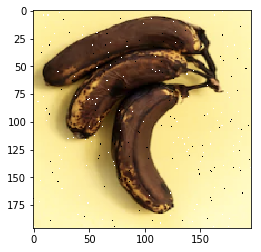

In [0]:
training_images= train_data_labeled()
testing_images = test_data_labeled()


In [0]:
tr_img_data = np.array([i[0].ravel() for i in training_images])
tr_lbl_data = np.array([i[1] for i in training_images])
tst_img_data = np.array([i[0].ravel() for i in testing_images])
tst_lbl_data = np.array([i[1] for i in testing_images])

In [0]:
tr_img_data = tr_img_data / 255
tst_img_data = tst_img_data / 255

KeyboardInterrupt: ignored

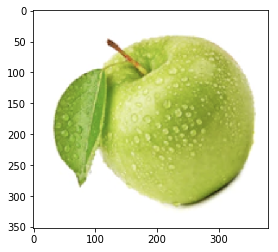

In [0]:
count = 0
for i in tst_img_data:
  print(i.shape)
  count +=1
  if count = 100:
    break

In [0]:

model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=[200,200,1]))
model.add(keras.layers.Conv2D(filters = 32, kernel_size = 5 , strides = 1, padding = 'same', activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size = 5, padding='same'))
model.add(keras.layers.Conv2D( 64, (3,3) , activation = 'relu') )
model.add(keras.layers.MaxPooling2D() )
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(6,activation='softmax'))



W0809 22:43:03.165745 140528778909568 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
 model.compile( optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 200, 200, 32)      2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 38, 38, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 19, 19, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 23104)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [0]:
result = model.fit(x = tr_img_data, y =tr_lbl_data , validation_split = 0.2 , epochs = 10)

ValueError: ignored

In [0]:
classifier = keras.Sequential()

classifier.add(keras.layers.Conv2D(32, (3, 3), input_shape = [200,200,3], activation = 'relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

classifier.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
classifier.add(keras.layers.Dropout(0.25))

classifier.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
classifier.add(keras.layers.Dropout(0.25))

classifier.add(keras.layers.Conv2D(256, (3, 3), activation = 'relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
classifier.add(keras.layers.Dropout(0.25))

classifier.add(keras.layers.Flatten())

classifier.add(keras.layers.Dense(units = 128, activation = 'relu'))
classifier.add(keras.layers.Dropout(0.25))
classifier.add(keras.layers.Dense(units = 128, activation = 'relu'))
classifier.add(keras.layers.Dropout(0.25))
classifier.add(keras.layers.Dense(units = 128, activation = 'relu'))
classifier.add(keras.layers.Dropout(0.25))
classifier.add(keras.layers.Dense(units = 6, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
resultado = classifier.fit(x = tr_img_data, y =tr_lbl_data , validation_split = 0.2 , epochs = 10)

Train on 8720 samples, validate on 2181 samples
Epoch 1/3
2752/8720 [========>.....................] - ETA: 8:37 - loss: 2838559974032.1431 - acc: 0.1930

KeyboardInterrupt: ignored